<a href="https://colab.research.google.com/github/HRashidLiaquat/lessons-learned/blob/main/Fruits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Title: Fruit Classification with Convolutional Neural Network**


**Project Workflow**
1.  Import important libraries
2.  Get data ready in Kaggle.
3.  Preparing My Images
4.  Loading training images
5.  Create Data Loaders
6.  Build A model
7.  Model training
8.  Model Testing (Training Loop)
9.  Model Evaluation
10.  Testing with new data point
11.  Save model

**Import important libraries**

In [89]:
from pathlib import Path
import torch
import torch.nn as nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim
import zipfile
from PIL import Image
import torch.nn.functional as F



In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Zip to up Zip datasets**

In [57]:
zip_path = Path("/content/drive/MyDrive/Colab Notebooks/archive.zip")
extract_path = Path("/content/data")

print("ZIP exists:", zip_path.exists())

extract_path.mkdir(parents=True, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction completed successfully")

ZIP exists: True
Extraction completed successfully


**Get ready data in kaggle**

In [58]:
datset_path = Path('/content/data/fruits-360_100x100/fruits-360')

if datset_path.exists():
  print("Dataset found!")
else:
  print("Dataset not found!")


Dataset found!


In [59]:
if datset_path.exists():
  datsetfolderlist = list(datset_path.iterdir())
  print("See all folder in my dataset main folder")
  for allfolder in datsetfolderlist:
      print(allfolder)

See all folder in my dataset main folder
/content/data/fruits-360_100x100/fruits-360/Training
/content/data/fruits-360_100x100/fruits-360/README.md
/content/data/fruits-360_100x100/fruits-360/LICENSE
/content/data/fruits-360_100x100/fruits-360/Test


In [60]:
traning_path = datset_path / '/content/data/fruits-360_100x100/fruits-360/Training'
print(traning_path)
test_path = datset_path / '/content/data/fruits-360_100x100/fruits-360/Test'

print(test_path)

/content/data/fruits-360_100x100/fruits-360/Training
/content/data/fruits-360_100x100/fruits-360/Test


In [61]:
#count all types of data classes

train_classes = [item.name for item in traning_path.iterdir() if item.is_dir()]
train_classes.sort()
num_classes = len(train_classes)
print(f"📁 Total fruit classes: {num_classes}")

📁 Total fruit classes: 240


**Show some classes data **

In [62]:
for i,class_name in enumerate(train_classes[:10]):
    print(f"{i+1}. {class_name}")


1. Apple 10
2. Apple 11
3. Apple 12
4. Apple 13
5. Apple 14
6. Apple 17
7. Apple 18
8. Apple 19
9. Apple 5
10. Apple 6


In [63]:
for i, class_name in enumerate(train_classes[-10:]):
  print(f"{i+1}. {train_classes}")

1. ['Apple 10', 'Apple 11', 'Apple 12', 'Apple 13', 'Apple 14', 'Apple 17', 'Apple 18', 'Apple 19', 'Apple 5', 'Apple 6', 'Apple 7', 'Apple 8', 'Apple 9', 'Apple Braeburn 1', 'Apple Core 1', 'Apple Crimson Snow 1', 'Apple Golden 1', 'Apple Golden 2', 'Apple Golden 3', 'Apple Granny Smith 1', 'Apple Pink Lady 1', 'Apple Red 1', 'Apple Red 2', 'Apple Red 3', 'Apple Red Delicious 1', 'Apple Red Yellow 1', 'Apple Red Yellow 2', 'Apple Rotten 1', 'Apple hit 1', 'Apple worm 1', 'Apricot 1', 'Avocado 1', 'Avocado Black 1', 'Avocado Black 2', 'Avocado Green 1', 'Avocado ripe 1', 'Banana 1', 'Banana 3', 'Banana 4', 'Banana Lady Finger 1', 'Banana Red 1', 'Beans 1', 'Beetroot 1', 'Blackberrie 1', 'Blackberrie 2', 'Blackberrie half rippen 1', 'Blackberrie not rippen 1', 'Blueberry 1', 'Cabbage red 1', 'Cabbage white 1', 'Cactus fruit 1', 'Cactus fruit green 1', 'Cactus fruit red 1', 'Caju seed 1', 'Cantaloupe 1', 'Cantaloupe 2', 'Carambula 1', 'Carrot 1', 'Cauliflower 1', 'Cherimoya 1', 'Cherry 1

**Count Images in one class**

In [64]:
first_class = train_classes[0]
first_class_path = traning_path/ first_class
num_images = len(list(first_class_path.iterdir()))
print(f"First class: {first_class}")
print(f"Number of images: {num_classes}")


First class: Apple 10
Number of images: 240


**count multiple classes**

In [65]:
for i, class_name in enumerate(train_classes[:5]):
  class_folder = traning_path / class_name
  num_images = len(list(class_folder.iterdir()))
  print(f"{i + 1}. {class_name}: {num_images} images")

1. Apple 10: 699 images
2. Apple 11: 430 images
3. Apple 12: 466 images
4. Apple 13: 699 images
5. Apple 14: 466 images


**Loard First Image**

In [66]:
first_class = train_classes[0]
first_image_path = list(first_class_path.iterdir())[0]

img = Image.open(first_image_path)

print(f"Class: {first_class}")
print(f"Image name: {first_class_path.name}")
print(f"Image size:{img.size}")
print(f"Image mode: {img.mode}")

Class: Apple 10
Image name: Apple 10
Image size:(100, 100)
Image mode: RGB


**Display first Image**

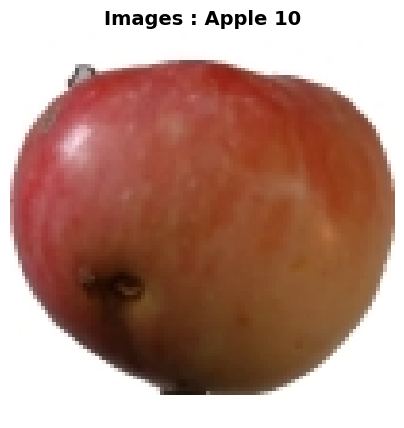

In [67]:
plt.figure(figsize = (5, 5))
plt.imshow(img)
plt.title(f"Images : {first_class}", fontsize = 14, fontweight = 'bold')
plt.axis('off')
plt.show()

**Show some Random images**

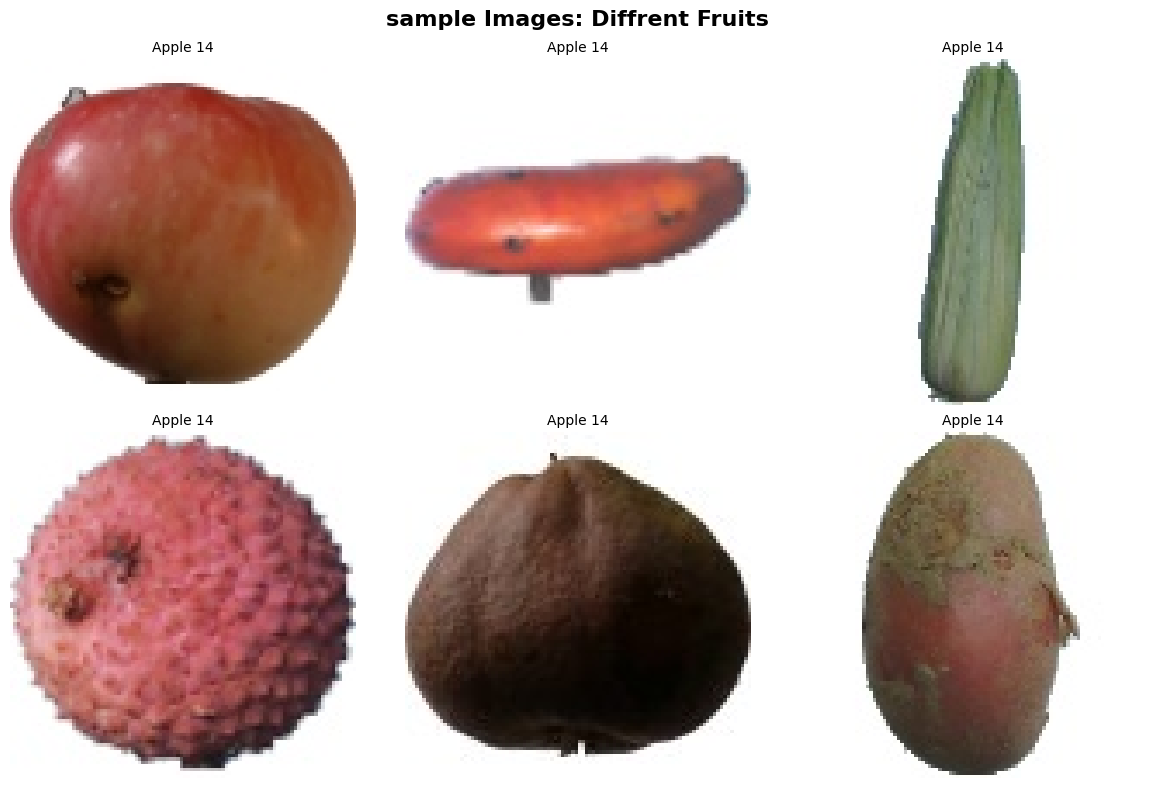

In [68]:
fig, axes = plt.subplots(2, 3, figsize = (12, 8))
axes = axes.ravel()
total_classes = len(train_classes)
step = total_classes//6
for i in range(6):
  class_idx = i * step
  fruit_name = train_classes[class_idx]
  fruit_path = traning_path / fruit_name
  image_path = list(fruit_path.iterdir())[0]
  img = Image.open(image_path)

  axes[i].imshow(img)
  axes[i].set_title(class_name, fontsize = 10)
  axes[i].axis('off')

plt.suptitle('sample Images: Diffrent Fruits', fontsize = 16, fontweight = 'bold')
plt.tight_layout()
plt.show()

**Data Preprocessing**

In [69]:
simple_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])


**Test Transform on One Image**

In [70]:
test_class = train_classes[0]
test_class_path = traning_path / test_class
test_image_path = list(test_class_path.iterdir())[0]

original = Image.open(test_image_path)
transformed = simple_transform(original)
print(f"Type: {type(transformed.shape)}")
print(f"  Min value: {transformed.min():.3f}")
print(f"  Max value: {transformed.max():.3f}")


Type: <class 'torch.Size'>
  Min value: 0.004
  Max value: 1.000


**Visualize Transform Effect**

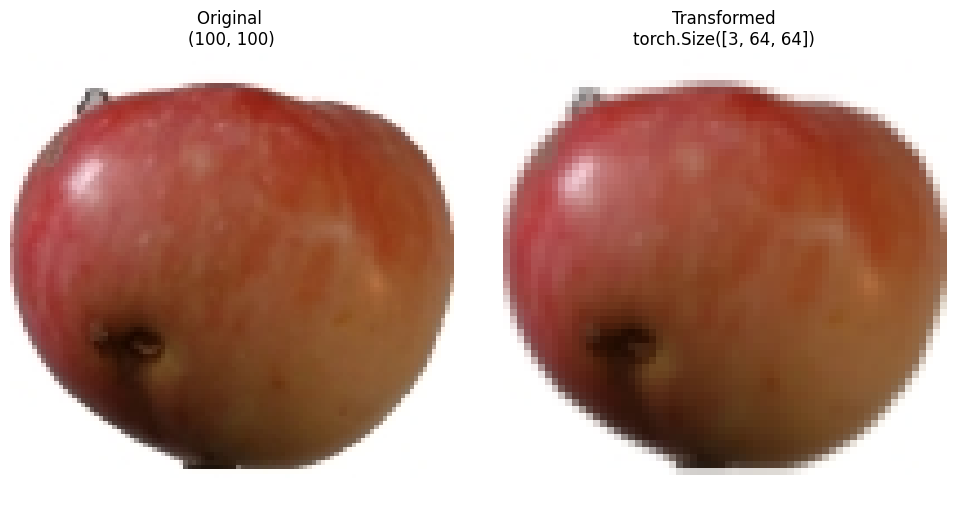

In [71]:
fig, axes = plt.subplots(1, 2, figsize = (10, 5))

axes[0].imshow(original)
axes[0].set_title(f'Original \n{original.size}')
axes[0].axis('off')

display = transformed.permute(1, 2, 0)
axes[1].imshow(display)
axes[1].set_title(f'Transformed\n{transformed.shape}')
axes[1].axis('off')

plt.tight_layout()
plt.show()



**Normalization values**

In [72]:
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

print(f"Mean: {mean}")
print(f"Std: {std}")


Mean: [0.485, 0.456, 0.406]
Std: [0.229, 0.224, 0.225]


**Create Training Transform**

In [73]:
train_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
])
print("  1. Resize to 64x64")
print("  2. Random flip")
print("  3. Random rptation")
print("  4. Convert to tensor")
print("  5. Normalize")

  1. Resize to 64x64
  2. Random flip
  3. Random rptation
  4. Convert to tensor
  5. Normalize


**Test Transform**

In [74]:
train_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
])
print("  1. Resize to 64x64")
print("  2. Convert to tensor")
print("  3. Normalize")

  1. Resize to 64x64
  2. Convert to tensor
  3. Normalize


**Load Training Dataset**

In [75]:
train_dataset = datasets.ImageFolder(
    root = traning_path,
    transform = train_transform
)

print(f"Total training images: {len(train_dataset)}")
print(f"Number of classes: {len(train_dataset.classes)}")


Total training images: 126243
Number of classes: 240


**Load Test Dataset**

In [76]:
test_dataset = datasets.ImageFolder(
    root = test_path,
    transform = train_transform
)

print(f"Total training images: {len(test_dataset)}")
print(f"Number of classes: {len(test_dataset.classes)}")

Total training images: 42082
Number of classes: 240


**Test Dataset Access**

In [77]:
image, label = train_dataset[0]
print(f"  Image shape: {image.shape}")
print(f"Image type: : {type(image)}")
print(f" Label : {label}")
print(f"Class name: {train_dataset.classes[label]}")


  Image shape: torch.Size([3, 64, 64])
Image type: : <class 'torch.Tensor'>
 Label : 0
Class name: Apple 10


**Set batch size **

In [78]:
batch_size  = 32
print(f"Mdel will see {batch_size} images of once")

Mdel will see 32 images of once


**Create Training DataLoader**

In [79]:
train_loader = DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True
)


print(f"\nBatches per epoch: {len(train_loader)}")


Batches per epoch: 3946


**Test DataLoader**

In [80]:
test_loader = DataLoader(
    test_dataset,
    batch_size=batch_size,
    shuffle=False
)

print(f"\nTest batches: {len(test_loader)}")


Test batches: 1316


**Test DataLoader**

In [81]:
images, labels = next(iter(train_loader))

In [82]:
print("One batch from DataLoader:")
print(f"  Images shape: {images.shape}")
print(f"  Labels shape: {labels.shape}")
print(f"\nBreaking down images shape:")
print(f"  {images.shape[0]} = batch size")
print(f"  {images.shape[1]} = channels (RGB)")
print(f"  {images.shape[2]} = height")
print(f"  {images.shape[3]} = width")

One batch from DataLoader:
  Images shape: torch.Size([32, 3, 64, 64])
  Labels shape: torch.Size([32])

Breaking down images shape:
  32 = batch size
  3 = channels (RGB)
  64 = height
  64 = width


**Visualize One Batch**

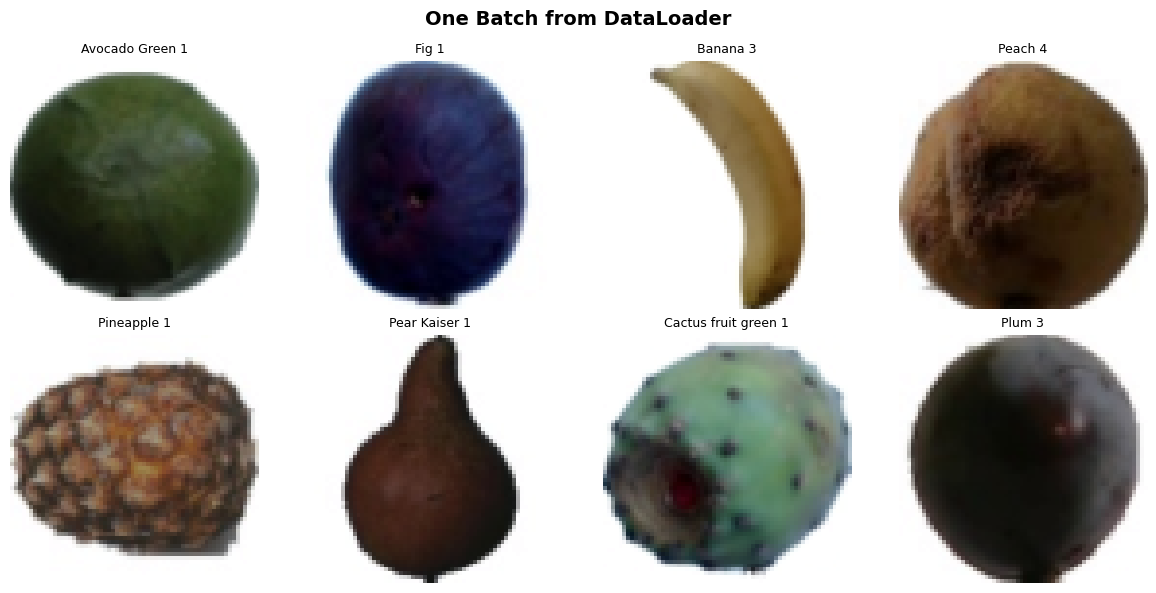

In [83]:
# Visualize first 8 images from batch
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
axes = axes.flatten()

# Denormalize function
def denorm(img):
    img = img.clone()
    for t, m, s in zip(img, mean, std):
        t.mul_(s).add_(m)
    return torch.clamp(img, 0, 1)

for i in range(8):
    # Get image and label
    img = images[i]
    label = labels[i]

    # Denormalize and display
    img = denorm(img)
    img = img.permute(1, 2, 0)

    axes[i].imshow(img)
    axes[i].set_title(train_dataset.classes[label], fontsize=9)
    axes[i].axis('off')

plt.suptitle('One Batch from DataLoader', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


**BUILD CNN MODEL**

In [84]:
# Define our CNN model
class FruitCNN(nn.Module):
    def __init__(self, num_classes):
        super(FruitCNN, self).__init__()

        # Convolutional layers
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)

        # Pooling layer
        self.pool = nn.MaxPool2d(2, 2)

        # Fully connected layers
        self.fc1 = nn.Linear(128 * 8 * 8, 512)
        self.fc2 = nn.Linear(512, num_classes)

        # Dropout
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        # Conv block 1
        x = self.pool(F.relu(self.conv1(x)))
        # Conv block 2
        x = self.pool(F.relu(self.conv2(x)))
        # Conv block 3
        x = self.pool(F.relu(self.conv3(x)))

        # Flatten
        x = x.view(-1, 128 * 8 * 8)

        # Fully connected
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)

        return x

model = FruitCNN(num_classes)
print(model)

FruitCNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=8192, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=240, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)


**Move model CPU to GPU**

In [85]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

print(f"Model moved to: {device}")

Model moved to: cpu


**Define loss function and Optimizer**

In [87]:
criterion = nn.CrossEntropyLoss()

In [93]:
images, labels = next(iter(train_loader))
images = images.to(device)
labels = labels.to(device)

# Step 2: Model predictions
model.eval()
outputs = model(images)

loss = criterion(outputs, labels)

print(f"\nBatch size: {images.shape[0]}")
print(f"Model outputs shape: {outputs.shape}")
print(f"Labels shape: {labels.shape}")
print(f"\nLoss value: {loss.item():.4f}")
print()
print("What this means:")
print(f"  Loss = {loss.item():.4f}")
if loss.item() > 3:
    print("Model is guessing randomly (high loss)")
elif loss.item() > 1:
    print("Model is learning but not great")
else:
    print("Model is doing well! (low loss)")


Batch size: 32
Model outputs shape: torch.Size([32, 240])
Labels shape: torch.Size([32])

Loss value: 5.4780

What this means:
  Loss = 5.4780
Model is guessing randomly (high loss)


In [96]:
learning_rate = 0.001
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

print(f"Learning rate: {learning_rate}")
print(f"Parameters being optimized: {sum(p.numel() for p in model.parameters()):,}")

Learning rate: 0.001
Parameters being optimized: 4,411,184


**Device moved**

In [97]:
num_epochs = 10
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

In [99]:
images, labels = next(iter(train_loader))
images = images.to(device)
labels = labels.to(device)
model.train()
outputs = model(images)
loss_before = criterion(outputs, labels)

print(f"Loss before optimization: {loss_before.item():.4f}")

Loss before optimization: 5.4870


**Loss after Optimization**

In [100]:
optimizer.zero_grad()
loss_before.backward()
optimizer.step()
outputs = model(images)
loss_after = criterion(outputs, labels)

print(f"Loss after optimization: {loss_after.item():.4f}")

Loss after optimization: 5.0658


**Traning loop**